In [2]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR
from datasets import inputs
import configs
import pandas as pd
import seaborn as sns

device = 'cpu'

In [3]:
trained_dir = f'{configs.engram_dir}02_gamma_v_ss_3000/'

In [4]:
results_file = trained_dir + 'results.p'
with open(results_file, 'rb') as f:
    results = pickle.load(f)

In [5]:
results['nonlinearity_args'] = [str(x) for x in results['nonlinearity_args']]

In [24]:
df = pd.DataFrame(results)

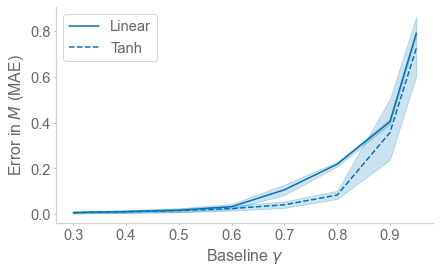

In [31]:
plt.figure(figsize=(6.4, 4.8*0.85))
g = sns.lineplot(
    x ='gammas', y='vals', label='Linear', linestyle='-', color='C0',
    data=df[df['nonlinearity_args']=='Linear']
    )
g = sns.lineplot(
    x ='gammas', y='vals', label='Tanh', linestyle='--', color='C0',
    data=df[df['nonlinearity_args']=='Tanh']
    )
g.get_legend().set_title(None)
plt.ylabel("Error in $M$ (MAE)")
plt.xlabel("Baseline $\gamma$")
plt.tight_layout()
plt.savefig('3b_gammas.png', dpi=300)
plt.show()